In [55]:
import pandas as pd
import numpy as np
import yfinance as yf

In [56]:
gamma_dix_df = pd.read_csv("GammaDixExposure.csv", parse_dates=True, infer_datetime_format=True)

In [57]:
gamma_dix_df

,date,price,dix,gex
0,5/2/11,1361.219971,0.378842,1.897313e+09
1,5/3/11,1356.619995,0.383411,1.859731e+09
2,5/4/11,1347.319946,0.392122,1.717764e+09
3,5/5/11,1335.099976,0.405457,1.361864e+09
4,5/6/11,1340.199951,0.418649,1.490329e+09
...,...,...,...,...
2899,11/4/22,3770.550049,0.425303,5.863258e+08
2900,11/7/22,3806.800049,0.449861,1.164755e+09
2901,11/8/22,3828.110107,0.438960,1.395167e+09
2902,11/9/22,3748.570068,0.457835,4.817286e+07


In [58]:
gamma_dix_df["SPX Change"] = gamma_dix_df["price"].pct_change().dropna()

In [59]:
gamma_dix_df

,date,price,dix,gex,SPX Change
0,5/2/11,1361.219971,0.378842,1.897313e+09,NaN
1,5/3/11,1356.619995,0.383411,1.859731e+09,-0.003379
2,5/4/11,1347.319946,0.392122,1.717764e+09,-0.006855
3,5/5/11,1335.099976,0.405457,1.361864e+09,-0.009070
4,5/6/11,1340.199951,0.418649,1.490329e+09,0.003820
...,...,...,...,...,...
2899,11/4/22,3770.550049,0.425303,5.863258e+08,0.013619
2900,11/7/22,3806.800049,0.449861,1.164755e+09,0.009614
2901,11/8/22,3828.110107,0.438960,1.395167e+09,0.005598
2902,11/9/22,3748.570068,0.457835,4.817286e+07,-0.020778


In [60]:
vix_df = yf.download(tickers="^VIX", start="2011-05-02")

[*********************100%***********************]  1 of 1 completed


In [61]:
previous_close = vix_df["Adj Close"].shift()

In [62]:
vix_df["Vix Previous Close"] = previous_close

In [63]:
vix_df.drop(columns=["Adj Close", "Volume", "High", "Low", "Open"], inplace=True)

In [64]:
vix_df

,Close,Vix Previous Close
Date,,
2011-05-02,15.990000,NaN
2011-05-03,16.700001,15.990000
2011-05-04,17.080000,16.700001
2011-05-05,18.200001,17.080000
2011-05-06,18.400000,18.200001
...,...,...
2022-11-07,24.350000,24.549999
2022-11-08,25.540001,24.350000
2022-11-09,26.090000,25.540001


In [65]:
vix_rolling_average = vix_df["Close"].rolling(21).mean()

In [66]:
vix_df["Vix 21 Moving Average"] = vix_rolling_average

In [67]:
vix_df.drop(columns=["Close"], inplace=True)

In [69]:
gamma_dix_df

,date,price,dix,gex,SPX Change
0,5/2/11,1361.219971,0.378842,1.897313e+09,NaN
1,5/3/11,1356.619995,0.383411,1.859731e+09,-0.003379
2,5/4/11,1347.319946,0.392122,1.717764e+09,-0.006855
3,5/5/11,1335.099976,0.405457,1.361864e+09,-0.009070
4,5/6/11,1340.199951,0.418649,1.490329e+09,0.003820
...,...,...,...,...,...
2899,11/4/22,3770.550049,0.425303,5.863258e+08,0.013619
2900,11/7/22,3806.800049,0.449861,1.164755e+09,0.009614
2901,11/8/22,3828.110107,0.438960,1.395167e+09,0.005598
2902,11/9/22,3748.570068,0.457835,4.817286e+07,-0.020778


In [73]:
vix_df.to_csv('C:\\Users\\Drew Haggerty\\Desktop\\for_fun \\Vix.csv')

In [74]:
gamma_dix_df.to_csv('C:\\Users\\Drew Haggerty\\Desktop\\for_fun \\GammaDix.csv')

In [75]:
vix_df

,Vix Previous Close,Vix 21 Moving Average
Date,,
2011-05-02,NaN,NaN
2011-05-03,15.990000,NaN
2011-05-04,16.700001,NaN
2011-05-05,17.080000,NaN
2011-05-06,18.200001,NaN
...,...,...
2022-11-07,24.549999,28.875714
2022-11-08,24.350000,28.546667
2022-11-09,25.540001,28.187619


In [77]:
gamma_vix_df = pd.read_csv("GammaDixUpdate.csv")

In [80]:
dix_previous_close = gamma_vix_df["dix"].shift()

In [81]:
gamma_vix_df["DIX Previous Close"] = dix_previous_close

In [83]:
gex_previous_close = gamma_dix_df["gex"].shift()

In [84]:
gamma_vix_df["GEX Previous Close"] = gex_previous_close

In [87]:
gamma_vix_df.drop(columns=["dix", "gex"], inplace=True)

In [90]:
gamma_vix_df.dropna(inplace=True)

In [91]:
gamma_vix_df

,date,price,Vix Previous Close,Vix 21 Moving Average,SPX Change,DIX Previous Close,GEX Previous Close
20,5/31/11,1345.199951,15.980000,16.911429,0.010593,0.400935,9.186650e+08
21,6/1/11,1314.550049,15.450000,17.021429,-0.022785,0.402477,1.501019e+09
22,6/2/11,1312.939941,18.299999,17.087619,-0.001225,0.441582,7.654729e+08
23,6/3/11,1300.160034,18.090000,17.129048,-0.009734,0.413070,7.370545e+08
24,6/6/11,1286.170044,17.950001,17.142857,-0.010760,0.436110,4.059565e+08
...,...,...,...,...,...,...,...
2899,11/4/22,3770.550049,25.299999,29.209524,0.013619,0.442476,-6.368992e+08
2900,11/7/22,3806.800049,24.549999,28.875714,0.009614,0.425303,5.863258e+08
2901,11/8/22,3828.110107,24.350000,28.546667,0.005598,0.449861,1.164755e+09
2902,11/9/22,3748.570068,25.540001,28.187619,-0.020778,0.438960,1.395167e+09


In [95]:
gamma_vix_df.drop(columns=["date", "price"], inplace=True)

In [116]:
spx_absolute_value = gamma_vix_df["SPX Change"].abs()

In [117]:
gamma_vix_df["SPX Move"] = spx_absolute_value

In [119]:
gamma_vix_df.drop(columns=["SPX Change"], inplace=True)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [121]:
y = gamma_vix_df["SPX Move"]
X = gamma_vix_df.drop(columns=["SPX Move"])

In [123]:
X

,Vix Previous Close,Vix 21 Moving Average,DIX Previous Close,GEX Previous Close
20,15.980000,16.911429,0.400935,9.186650e+08
21,15.450000,17.021429,0.402477,1.501019e+09
22,18.299999,17.087619,0.441582,7.654729e+08
23,18.090000,17.129048,0.413070,7.370545e+08
24,17.950001,17.142857,0.436110,4.059565e+08
...,...,...,...,...
2899,25.299999,29.209524,0.442476,-6.368992e+08
2900,24.549999,28.875714,0.425303,5.863258e+08
2901,24.350000,28.546667,0.449861,1.164755e+09
2902,25.540001,28.187619,0.438960,1.395167e+09


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [125]:
scaler = StandardScaler()

In [126]:
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
model = RandomForestRegressor()

In [129]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [130]:
y_pred = model.predict(X_test)

In [131]:
model.score(X,y)

0.7461028627247066

In [132]:
importances_names = model.feature_names_in_

In [133]:
importances=model.feature_importances_

In [134]:
importances_df = pd.DataFrame(importances,importances_names)

In [135]:
importances_df.sort_values(by=0, ascending=False)

,0
Vix Previous Close,0.489166
GEX Previous Close,0.209134
Vix 21 Moving Average,0.156060
DIX Previous Close,0.145639


<AxesSubplot:>

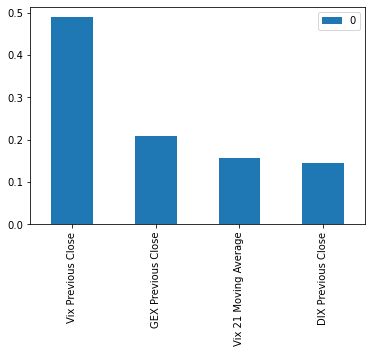

In [136]:
importances_df.sort_values(by = 0, ascending=False).plot(kind = "bar")

In [143]:
gex_spx_df = gamma_vix_df.drop(columns=["Vix Previous Close", "Vix 21 Moving Average", "DIX Previous Close"])

In [160]:
gex_spx_df

,GEX Previous Close,SPX Move
20,9.186650e+08,0.010593
21,1.501019e+09,0.022785
22,7.654729e+08,0.001225
23,7.370545e+08,0.009734
24,4.059565e+08,0.010760
...,...,...
2899,-6.368992e+08,0.013619
2900,5.863258e+08,0.009614
2901,1.164755e+09,0.005598
2902,1.395167e+09,0.020778


In [161]:
y = gex_spx_df["SPX Move"]

In [162]:
X = gex_spx_df["GEX Previous Close"]

In [157]:
from sklearn.preprocessing import PolynomialFeatures

In [159]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [164]:
X_poly = poly_features.fit_transform(gex_spx_df)

In [ ]:
X_vals_poly = 